# Regression challenge


This Jupyter notebook consists of the data cleaning, data vizualisation and model implementation for the following Data Challenge : [NYC taxis tips](https://www.kaggle.com/competitions/nyc-taxis-tips/overview)

The goal of this challenge is the prediction of the tip amount based on various metrics : trip distance, number of passengers ...


## Libraries


In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data


In [25]:
# URL du dépôt GitHub
repo_url = 'https://github.com/JorisCaudard/M2_Data_Challenge.git'
repo_name = 'M2-Data_challenge'

In [26]:
DATA_FOLDER = "../Data/Regression"

TRAIN_FILE_NAME = "train.parquet"
TEST_FILE_NAME = "test.parquet"
NAIVE_SUBMISSION_FILE_NAME = "naive_submission.parquet"
SUBMISSION_FILE_NAME = "submission"

In [27]:
dfTrain = pd.read_parquet(os.path.join(DATA_FOLDER, TRAIN_FILE_NAME))
dfTest = pd.read_parquet(os.path.join(DATA_FOLDER, TEST_FILE_NAME))
dfSubmission = pd.read_parquet(os.path.join(DATA_FOLDER, NAIVE_SUBMISSION_FILE_NAME))

## Data Exploration


First step of this notebook is a bit of Data exploration ; understanding the data and cleaning it if necessary can give us some insights into what we need to predict and how we'll do it


### Naive data exploration


Let's first look at the datasets we will manipulate


In [28]:
dfTrain.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2024-01-15 20:37:28   2024-01-15 20:56:43              1.0   
1         2  2024-01-25 19:41:24   2024-01-25 19:44:42              1.0   
2         2  2024-01-25 15:48:48   2024-01-25 16:24:23              2.0   
3         2  2024-01-27 00:47:26   2024-01-27 00:55:55              1.0   
4         2  2024-01-28 13:14:26   2024-01-28 13:22:34              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  payment_type  fare_amount  \
0           3.30         1.0                  N             1         19.1   
1           0.72         1.0                  N             1          5.8   
2           7.45         1.0                  N             1         38.7   
3           1.53         1.0                  N             1         10.0   
4           1.53         1.0                  N             1         10.0   

   extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0    3.5      0.5        4.80           0.0                    1.0   
1    2.5      0.5        2.46           0.0                    1.0   
2    0.0      0.5        3.00           0.0                    1.0   
3    1.0      0.5        2.25           0.0                    1.0   
4    0.0      0.5        3.50           0.0                    1.0   

   congestion_surcharge  Airport_fee  PU_location_lat  PU_location_lon  \
0                   2.5          0.0        40.734576       -74.002875   
1                   2.5          0.0        40.768615       -73.965635   
2                   2.5          0.0        40.717773       -74.007880   
3                   2.5          0.0        40.720889       -73.996919   
4                   2.5          0.0        40.768615       -73.965635   

   DO_location_lat  DO_location_lon  
0        40.768615       -73.965635  
1        40.780436       -73.957012  
2        40.780436       -73.957012  
3        40.747746       -73.978492  
4        40.747746       -73.978492

In [29]:
dfTrain.isnull().sum() ##No missing cell data

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
Airport_fee              0
PU_location_lat          0
PU_location_lon          0
DO_location_lat          0
DO_location_lon          0
dtype: int64

In [30]:
dfTrain.describe(include='all')

/tmp/ipykernel_11905/1037661124.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfTrain.describe(include='all')
/tmp/ipykernel_11905/1037661124.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfTrain.describe(include='all')


VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
count   100000.000000               100000                100000   
unique            NaN                97567                 97596   
top               NaN  2024-01-26 22:04:27   2024-01-12 14:45:50   
freq              NaN                    4                     3   
first             NaN  2023-12-31 23:56:46   2024-01-01 00:03:50   
last              NaN  2024-01-31 23:59:07   2024-02-01 10:57:24   
mean         1.759540                  NaN                   NaN   
std          0.427365                  NaN                   NaN   
min          1.000000                  NaN                   NaN   
25%          2.000000                  NaN                   NaN   
50%          2.000000                  NaN                   NaN   
75%          2.000000                  NaN                   NaN   
max          2.000000                  NaN                   NaN   

        passenger_count  trip_distance     RatecodeID store_and_fwd_flag  \
count     100000.000000  100000.000000  100000.000000             100000   
unique              NaN            NaN            NaN                  2   
top                 NaN            NaN            NaN                  N   
freq                NaN            NaN            NaN              99578   
first               NaN            NaN            NaN                NaN   
last                NaN            NaN            NaN                NaN   
mean           1.335090       3.213008       1.998210                NaN   
std            0.847745       4.219928       9.594546                NaN   
min            0.000000       0.010000       1.000000                NaN   
25%            1.000000       1.000000       1.000000                NaN   
50%            1.000000       1.690000       1.000000                NaN   
75%            1.000000       3.100000       1.000000                NaN   
max            7.000000      53.640000      99.000000                NaN   

         payment_type    fare_amount          extra        mta_tax  \
count   100000.000000  100000.000000  100000.000000  100000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
first             NaN            NaN            NaN            NaN   
last              NaN            NaN            NaN            NaN   
mean         1.186610      18.044264       1.538507       0.497315   
std          0.458398      15.839824       1.788004       0.036542   
min          1.000000       0.000000       0.000000       0.000000   
25%          1.000000       8.600000       0.000000       0.500000   
50%          1.000000      12.800000       1.000000       0.500000   
75%          1.000000      19.800000       2.500000       0.500000   
max          4.000000     214.800000      11.750000       0.500000   

           tip_amount   tolls_amount  improvement_surcharge  \
count   100000.000000  100000.000000          100000.000000   
unique            NaN            NaN                    NaN   
top               NaN            NaN                    NaN   
freq              NaN            NaN                    NaN   
first             NaN            NaN                    NaN   
last              NaN            NaN                    NaN   
mean         3.430985       0.525877               0.999882   
std          3.686474       2.020583               0.009412   
min          0.000000       0.000000               0.000000   
25%          1.000000       0.000000               1.000000   
50%          2.800000       0.000000               1.000000   
75%          4.200000       0.000000               1.000000   
max         99.000000      49.260000               1.000000   

        congestion_surcharge    Airport_fee  PU_location_lat  PU_location_lon  \
count          100000.000000  100000.000000    100

We can see a few different things from this table :

- VendorID, RatecodeID, payment_type, store_and_fwd_flag needs to be categorical variables ;
- tpep_pickup_datetime and tpep_dropoff_datetime needs to be change to numerical data instead of datetime format ;
- Since all trips take place in NYC, all latitude and longitude are relatively close to each other ;
- Some trips do not have passengers, it may be due to an error in the database ; I doubt it will affect the model too much though, we may keep it that way ;
- Some trips have a fare_amount == 0 ; It may be due to an error in the dataset, or just "free trips". Since there are so few of them, we'll delete them from the training dataset ;
- A lot of trips don't include tips (see later) ; WE'll try to implement models that can differentiate them (namely Hurdle models).


### Correlation Matrix


To better determine important features, we can first look at the correlation matrix


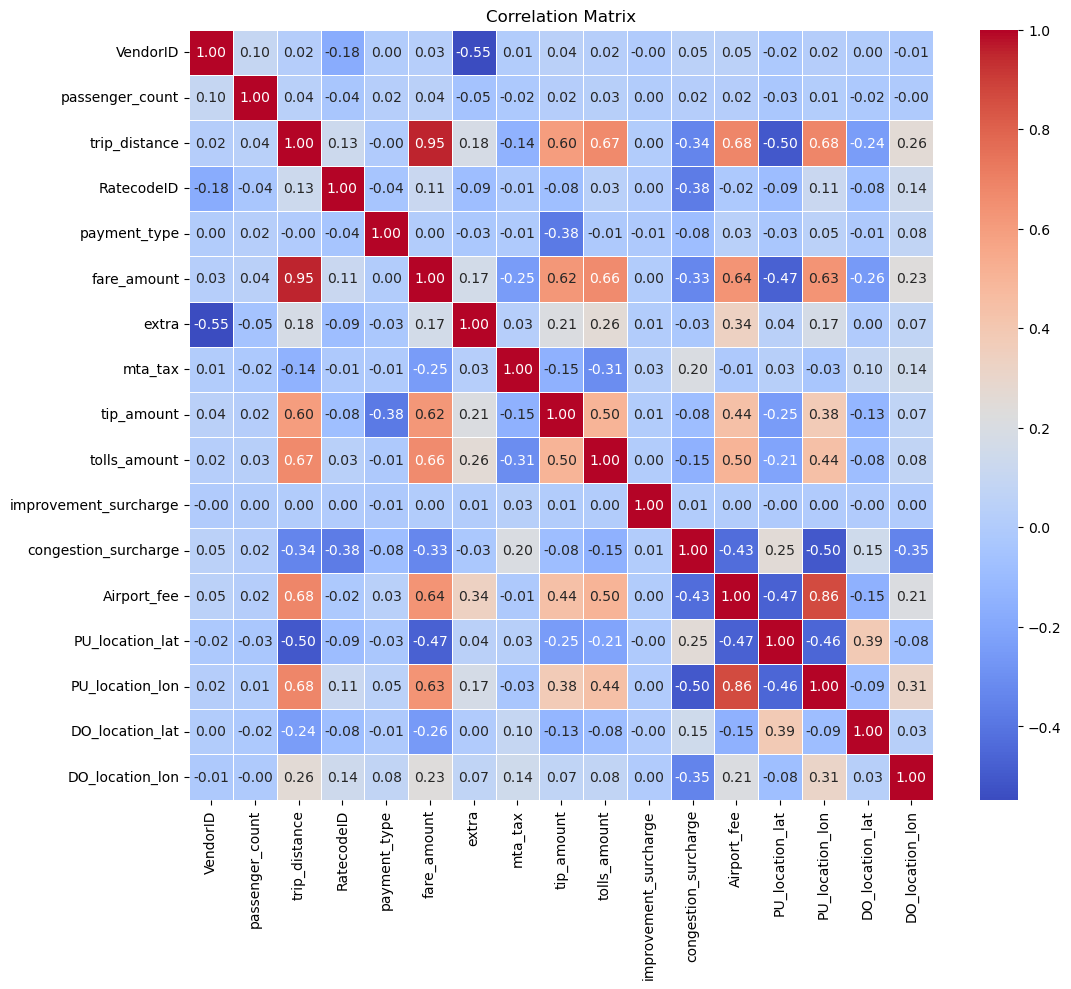

In [31]:
# Dropping non-numeric columns
dfTrain_numeric = dfTrain.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = dfTrain_numeric.corr()

# Plotting the correlation matrix using a Seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
corr_matrix['tip_amount'].sort_values(key= lambda x: abs(x), ascending=False)

tip_amount               1.000000
fare_amount              0.623595
trip_distance            0.600140
tolls_amount             0.500822
Airport_fee              0.439061
PU_location_lon          0.383503
payment_type            -0.378864
PU_location_lat         -0.247990
extra                    0.211149
mta_tax                 -0.152406
DO_location_lat         -0.128718
congestion_surcharge    -0.084581
RatecodeID              -0.081023
DO_location_lon          0.069843
VendorID                 0.044938
passenger_count          0.017716
improvement_surcharge    0.005529
Name: tip_amount, dtype: float64

We can see that the three most correlated variables are fare_amount, trip_distance, tolls_amount. However, all monetary variable are greatly linearly correlated with trip_distance (as expected)


### Histograms


We can look at the distribution of some variable of interest


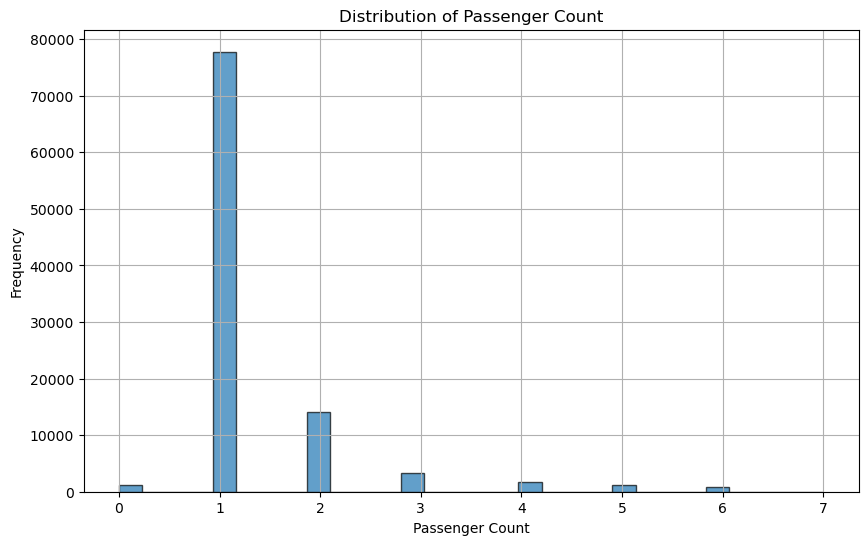

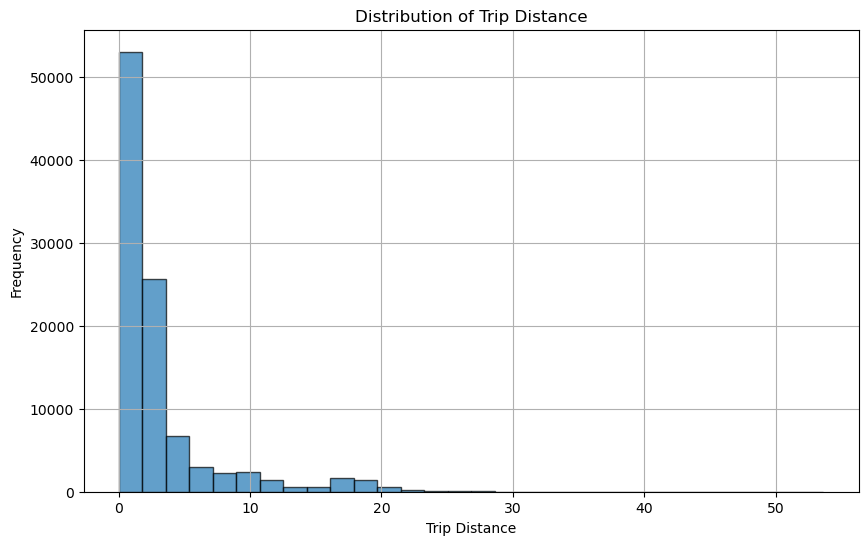

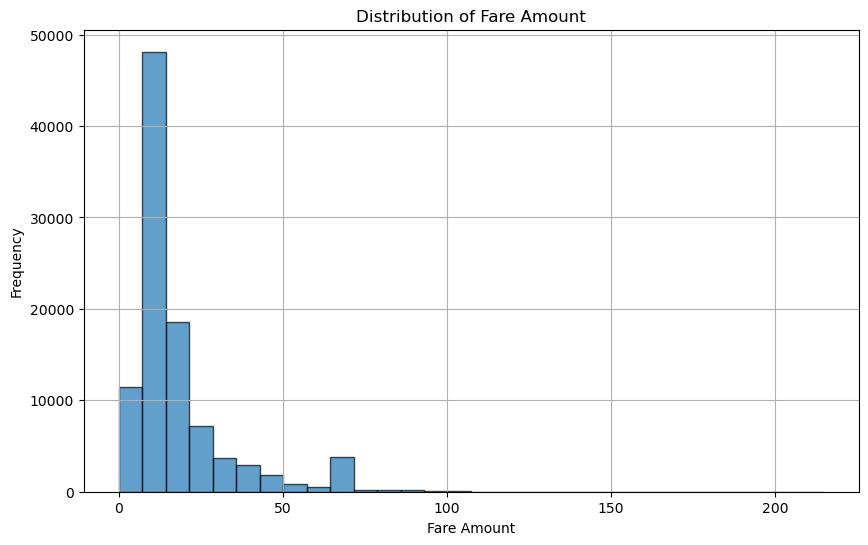

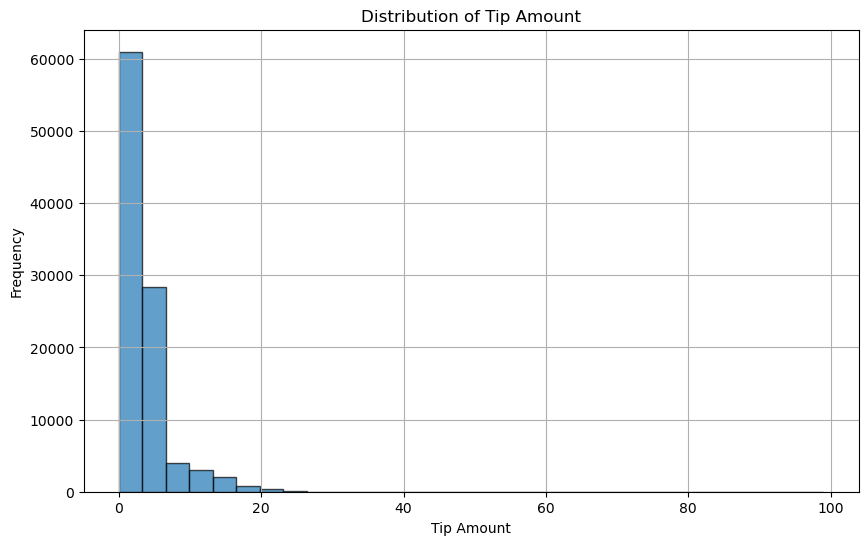

In [33]:
# Plotting passenger_count
plt.figure(figsize=(10, 6))
plt.hist(dfTrain['passenger_count'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting trip_distance
plt.figure(figsize=(10, 6))
plt.hist(dfTrain['trip_distance'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting fare_amount
plt.figure(figsize=(10, 6))
plt.hist(dfTrain['fare_amount'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting tip_amount
plt.figure(figsize=(10, 6))
plt.hist(dfTrain['tip_amount'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Let's look more closely at the tip_amount distribution :

We can see that the distribution have some extreme values (0 and 100). We can first remove some outliers to have a better understanding of the Data.

To do that, well' use the inter quartile method ; removing all values that don't fall within an interval based on the distribution quartiles.


In [34]:
Q1 = dfTrain['tip_amount'].quantile(0.25) ; Q1
Q3 = dfTrain['tip_amount'].quantile(0.75) ; Q3
IQR = Q3 - Q1

dfTrain_outliers = dfTrain[(dfTrain['tip_amount'] >= Q1 - 1.5*IQR) & ((dfTrain['tip_amount'] <= Q3 + 1.5*IQR))]

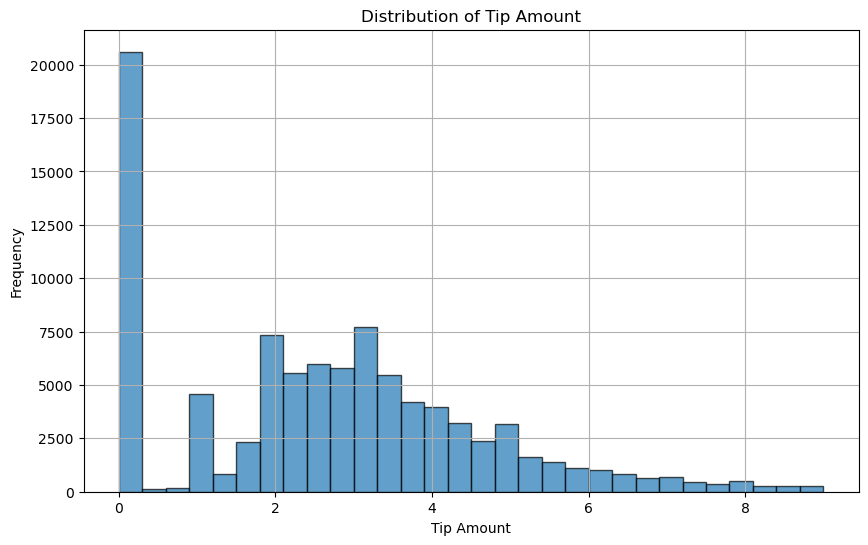

In [35]:
# Plotting tip_amount
plt.figure(figsize=(10, 6))
plt.hist(dfTrain_outliers['tip_amount'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We can then confirm our intuition : The tip_amount variable distribution consists of a peak at 0 (no tip), and then a normal distribution, with some peaks at integer values. We'll see if we can implement a model that can more accurately predict this distribution.


#### Heatmap based on location


We can use the PU location to display a Heatmap displaying the tip_amount.


In [36]:
import folium
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[dfTrain['PU_location_lat'].mean(), dfTrain['PU_location_lon'].mean()], zoom_start=11.5)

# Add heatmap
heat_data = [[row['PU_location_lat'], row['PU_location_lon'], row['tip_amount']] for index, row in dfTrain.iterrows()]

# Plot heatmap
HeatMap(heat_data, radius=15, gradient={0.2: 'lime', 0.5: 'yellow', 0.8: 'red'}).add_to(m)

# Display map
m


We can see some hotspots where the tip-amount is higher : Wall street and the financial district, some roads in centrak New York, but most important is the JFK airport.


### Data PCA


Before implementing those models, we can look at PCA : Reducing the dimension of the dataset could improve the future models.


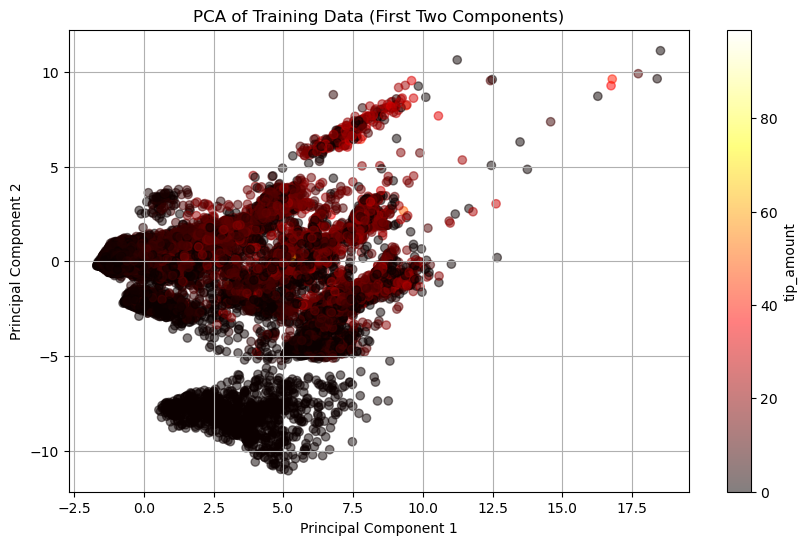

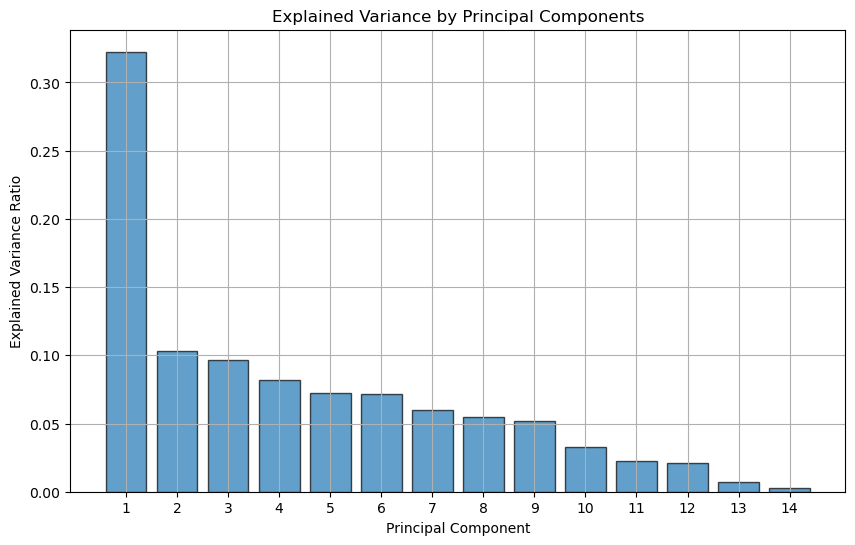

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(dfTrain.drop(columns=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'payment_type', 'tip_amount'])) #on enlève les colonnes non numériques

# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(X_train_scaled)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(14)])

# Plotting the PCA results for the first two components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=dfTrain['tip_amount'], cmap='hot', alpha=0.5)
plt.title('PCA of Training Data (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='tip_amount')
plt.show()

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, edgecolor='k')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

With this PCA analysis, we can see a clear cutoff of explained varianceafter the second principal component. We can also see tw odistinct groups in the displayed PCA based on the first two components, but the two obtained groups seems to be only loosely correlated with our variable of interest (tip_amount).

We'll first build models based on the full dataset, and we'll compare them with models based on fewer varaiables (namely the first two principal components of the PCA)


## Data cleaning


Based on this exploration, we'll need to do some cleaning before implementing the different models


In [38]:
##One Hot Encode all categorical variable
categoricalVariables = ['VendorID', 'RatecodeID', 'payment_type', 'store_and_fwd_flag']

dfTrain = pd.get_dummies(dfTrain, columns=categoricalVariables, drop_first=True, dtype='int')
dfTest = pd.get_dummies(dfTest, columns=categoricalVariables, drop_first=True, dtype='int')

dfTest = dfTest.reindex(columns=dfTrain.columns, fill_value=0) #Necessary to prevent errors when making predictions later
dfTest.drop(columns=['tip_amount'], inplace=True)

In [39]:
# Convert datetime to int64
dfTrain[['tpep_dropoff_datetime', 'tpep_pickup_datetime']] = dfTrain[['tpep_dropoff_datetime', 'tpep_pickup_datetime']].astype('int64')
dfTest[['tpep_dropoff_datetime', 'tpep_pickup_datetime']] = dfTest[['tpep_dropoff_datetime', 'tpep_pickup_datetime']].astype('int64')

## Building Models


We'll implement all models as pipelines in a dictionnary, then train all models at the same time and evaluate the results based on a 5-fold cross-validation method, evaluating the R2 score


### Model libraries


In [40]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR, LinearSVR

from xgboost import XGBRegressor

from pygam import LinearGAM, s, f

To fully use the Pipeline and dictionnary implement, we'll use custom class based on the BaseEstimator to creat custom models (Namely the basemodel, and the Hurdle models)/


In [41]:
class MeanPredictor(BaseEstimator):
    def __init__(self):
        self.mean = None
        
    def fit(self, X, y):
        # Calculate the mean of the target variable
        self.mean = np.mean(y)
        return self

    def predict(self, X):
        # Return the mean value for all predictions
        return np.full((X.shape[0],), self.mean)


In [42]:
class HurdleModel(BaseEstimator):
    def __init__(self, classifier, regressor):
        self.classifier = classifier
        self.regressor = regressor
        
    def fit(self, X, y):
        # Step 1: Fit the classifier to determine zero or non-zero
        self.classifier.fit(X, (y > 0).astype(int))
        
        # Step 2: Fit the regressor only on non-zero values
        non_zero_indices = y > 0
        self.regressor.fit(X[non_zero_indices], y[non_zero_indices])
        
        return self

    def predict(self, X):
        # Step 1: Classify all values as tip or no-tip
        predicted_classif = self.classifier.predict(X)
        # Step 2: Predict non-zero values
        predicted_values = self.regressor.predict(X)
        
        # Combine the results: return 0 where classifier predicts 0, else return regressor's predictions
        return predicted_classif * predicted_values


## Model dictionnary


Here, we'll implement all models in a single dictionnary. Each model will then be evaluated and compared to each other.


In [43]:
modelDict = {
    'Base model': Pipeline([
        ('regressor', MeanPredictor())
    ]),

    'Full Linear Model': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),

    'Select Linear Model' : Pipeline([
        ('column_selector', ColumnTransformer(
            transformers = [
                ('selector', 'passthrough', ['trip_distance', 'fare_amount', 'Airport_fee'])
            ],
            remainder='drop'
        )),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),

    'Random Forest Regressor' : Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor())
    ]),

    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', XGBRegressor())
    ]),

    'Hurdle Model (LogisticRegression + LinearRegression)': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', HurdleModel(classifier=LogisticRegression(max_iter=1000, solver='saga'), regressor=LinearRegression()))
    ]),

    'Hurdle Model (Logistic Regression + XGBoost)': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', HurdleModel(classifier=LogisticRegression(max_iter=1000, solver='saga'), regressor=XGBRegressor()))
    ]),

    'Full Linear Model (w/ PCA)': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.9)),
        ('regressor', LinearRegression())
    ]),

    'XGBoost (w/ PCA)': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.9)),
        ('regressor', XGBRegressor())
    ])
}

### Models Training


To evaluate the performance of each model, we will use the Cross-Validation method (with 5 folds). Each model will be traind on 80% of the Data, then evaluated on the remaining 20%. For each fold, we will compute the R2 score and the MSE obtained on the test fold.

We'll compare various models :

- First a baseline model ; By predicting for each metric the mean value of the target in the train set, we should obtain a R2 of 0 (uncorelated data) ;
- Then a Linear Model, with all variables ;
- Then a Linear model by selecting only a few of the variables, namely the most correlated one (cf. earlier) ;
- A Random Forest model ;
- A Boosting model (using XGBoost) ;
- Hurdle models : A Hurdle model consists of a classifier (to predict whether the trip will have a tip or not), and then a regressor trained on non-zero values. That way, we can hope to circumvent the skew towards 0-values we saw previously ;
- A version of some models with the adde PCA discussed earlier.


In [44]:
# Defining training data and training target
X = dfTrain.drop(columns=['tip_amount'])
y = dfTrain['tip_amount']

In [45]:
results = {}

for model_name, model_pipeline in modelDict.items():
    cv_results = cross_validate(model_pipeline, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error'])
    print(f"Model : {model_name} achieved a mean R2 score of {cv_results['test_r2'].mean():.2f} and a mean MSE of {-cv_results['test_neg_mean_squared_error'].mean():.2f}, model fitted in {cv_results['fit_time'].sum() + cv_results['score_time'].sum():.2f}s")
    results[model_name] = cv_results

Model : Base model achieved a mean R2 score of -0.00 and a mean MSE of 13.59, model fitted in 0.15s
Model : Full Linear Model achieved a mean R2 score of 0.61 and a mean MSE of 5.30, model fitted in 1.72s
Model : Select Linear Model achieved a mean R2 score of 0.39 and a mean MSE of 8.27, model fitted in 0.67s
Model : Random Forest Regressor achieved a mean R2 score of 0.68 and a mean MSE of 4.31, model fitted in 479.71s
Model : XGBoost achieved a mean R2 score of 0.69 and a mean MSE of 4.17, model fitted in 97.17s
Model : Hurdle Model (LogisticRegression + LinearRegression) achieved a mean R2 score of 0.70 and a mean MSE of 4.05, model fitted in 168.18s
Model : Hurdle Model (Logistic Regression + XGBoost) achieved a mean R2 score of 0.69 and a mean MSE of 4.25, model fitted in 173.09s
Model : Full Linear Model (w/ PCA) achieved a mean R2 score of 0.58 and a mean MSE of 5.69, model fitted in 1.34s
Model : XGBoost (w/ PCA) achieved a mean R2 score of 0.67 and a mean MSE of 4.45, model f

We can see some relatively expected results :

- Firstly, the Random Forest model take the longest to train compared to other models ;
- More complex models achieve better results than simpler linear ones ;
- PCA doesn't seem to improve the scores, and slows down training times ;
- Except with the linear model, Hurdle variants doesn't seem to improve scores.

We will then optimize hyperparameters using GridSearch on the best three models : XGBoost, Hurdle Model (Logistic Regression + Linear Regression), and Random Forest.


### Hyperparameters search


We'll first do a Randomized Search, to see if it's necessary to also use a more thorough Grid Search. Since Random Forest takes a long time to be fitted, we will not perform any parameter optimization on it (though code is written, feel free to try !)


In [46]:
xgb_param_grid = {
    'regressor__n_estimators': [50, 100, 200],       
    'regressor__max_depth': [3, 5, 7],              
    'regressor__learning_rate': [0.01, 0.1, 0.2],    
    'regressor__subsample': [0.6, 0.8, 1.0]          
}

hurdle_param_grid = {
    'regressor__classifier__penalty' : ['l2', 'l1', 'elasticnet'],
    'regressor__classifier__C': [0.1, 1, 10]
}

random_forest_param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300],
    'regressor__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'regressor__max_depth': [None, 10, 20, 30, 40],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__bootstrap': [True, False]
}

In [47]:
# Using RandomizedSearchCV for efficiency
xgb_search = RandomizedSearchCV(
    estimator=modelDict['XGBoost'],
    param_distributions=xgb_param_grid,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

hurdle_search = RandomizedSearchCV(
    estimator=modelDict['Hurdle Model (LogisticRegression + LinearRegression)'],
    param_distributions=hurdle_param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_forest_search = RandomizedSearchCV(
    estimator=modelDict['Random Forest Regressor'],
    param_distributions=random_forest_param_grid,
    n_iter=5,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [48]:
# Perform all random search

#xgb_search.fit(X, y)
#hurdle_search.fit(X, y)
#random_forest_search.fit(X,y)

In [49]:
# Print the best parameters and scores

#print("Best XGBoost Parameters:", xgb_search.best_params_)
#print("Best XGBoost R2 Score:", xgb_search.best_score_)

#print("Best Hurdle Model Parameters:", hurdle_search.best_params_)
#print("Best Hurdle Model R2 Score:", hurdle_search.best_score_)

#print("Best Random Forest Regressor Parameters:", random_forest_search.best_params_)
#print("Best Random Forest Regressor R2 Score:", random_forest_search.best_score_)

The randomized search doesn't seem to have significantly improve the models. We will keep the default parameters to make the finals predictions.


## Predictions on test set


We'll finally use the selectd model to make predictions on the test Dataset. We'll first train the models on all the training set, then make predictions on the test set. Finally, we'll save the results to submit them on the kaggle challenge.


In [56]:
def prediction(model_name, X, y, X_test, custom_params=None, model_name_alias=None):

    model = modelDict[model_name]

    if custom_params is not None:
        model.set_params(**custom_params)

    # Training model on all Train Dataset
    model.fit(X, y)

    # Making predictions
    model_predictions = model.predict(X_test).clip(min=0)

    # Saving predictions
    submission = dfSubmission.copy()
    submission['tip_amount'] = model_predictions

    submission.to_parquet(os.path.join(DATA_FOLDER, f"{SUBMISSION_FILE_NAME}_{model_name.replace(' ', '_') if model_name_alias is None else model_name_alias.replace(' ', '_')}.parquet"))

    print("Predictions saved !")

In [57]:
# using XGBoost with best parameters

prediction(model_name='XGBoost',
           X=dfTrain.drop(columns=['tip_amount']),
           y=dfTrain['tip_amount'],
           X_test = dfTest)

: 

In [ ]:
# using Hurdle Model with best parameters

prediction(model_name='Hurdle Model (LogisticRegression + LinearRegression)',
           model_name_alias = 'Hurdle Model',
           X=dfTrain.drop(columns=['tip_amount']),
           y=dfTrain['tip_amount'],
           X_test=dfTest)

In [ ]:
# using Random Forest with best parameters

prediction(model_name='Random Forest regressor',
           X=dfTrain.drop(columns=['tip_amount']),
           y=dfTrain['tip_amount'],
           X_test=dfTest)